In [6]:
from main_2 import main, Config
import matplotlib.pyplot as plt

import numpy as np

In [2]:
emsize_nhid_values = [200, 400, 600]  # Example values
nlayers_values = [1, 2, 3]

### Running experiment on LSTM model only

In [3]:
results = {}
config = Config()
config.epochs = 5 #shorten # of epoch for time efficiency
for emsize_nhid in emsize_nhid_values:
    for nlayers in nlayers_values:
        config.emsize = emsize_nhid
        config.nhid = emsize_nhid
        config.nlayers = nlayers

        if emsize_nhid == 200 and nlayers == 2:
            continue  # Skip this iteration - already have results from part 1
        print(f"Running experiment for: emsize_nhid:  {emsize_nhid}, nlayers: {nlayers}")
        test_ppl = main(config)
        results[(emsize_nhid, nlayers)] = test_ppl

Running experiment for: emsize_nhid:  200, nlayers: 1


/Users/phuongdo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


| epoch   1 |   200/ 2983 batches | lr 20.00 | ms/batch 119.88 | loss  7.51 | ppl  1825.08
| epoch   1 |   400/ 2983 batches | lr 20.00 | ms/batch 119.79 | loss  6.63 | ppl   759.28
| epoch   1 |   600/ 2983 batches | lr 20.00 | ms/batch 124.85 | loss  6.26 | ppl   525.20
| epoch   1 |   800/ 2983 batches | lr 20.00 | ms/batch 130.36 | loss  6.12 | ppl   456.30
| epoch   1 |  1000/ 2983 batches | lr 20.00 | ms/batch 131.05 | loss  6.00 | ppl   402.27
| epoch   1 |  1200/ 2983 batches | lr 20.00 | ms/batch 137.95 | loss  5.94 | ppl   378.15
| epoch   1 |  1400/ 2983 batches | lr 20.00 | ms/batch 133.98 | loss  5.84 | ppl   344.20
| epoch   1 |  1600/ 2983 batches | lr 20.00 | ms/batch 132.68 | loss  5.86 | ppl   350.49
| epoch   1 |  1800/ 2983 batches | lr 20.00 | ms/batch 132.19 | loss  5.71 | ppl   301.58
| epoch   1 |  2000/ 2983 batches | lr 20.00 | ms/batch 131.87 | loss  5.68 | ppl   293.92
| epoch   1 |  2200/ 2983 batches | lr 20.00 | ms/batch 132.00 | loss  5.58 | ppl   265.19

### Insert the default setting (nhid,nlayers) = (200,2) ppl from the result we got from part 1

- Note that part 1 test ppl is from running 40 epochs on LSTM model. Due to time and resource constraints, we only run 5 epochs for this part. 
- We will use the valid ppl at the 5th epoch from results from part 1 for both models and insert that in our result arrays. 

In [5]:
results[(200,2)] = 153.89
print(results)

{(200, 1): 143.77090199371608, (200, 3): 151.87475195402064, (400, 1): 132.66005903254367, (400, 2): 130.86974352813272, (400, 3): 137.64010912026978, (600, 1): 132.04536211588263, (600, 2): 131.36822508468444, (600, 3): 134.87010264870946, (200, 2): 153.89}


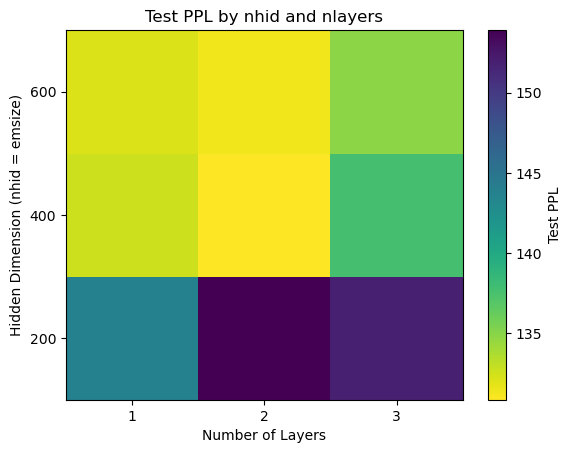

In [9]:
# Extract unique nhid and nlayers values
nhid_values = sorted(set(key[0] for key in results.keys()))
nlayers_values = sorted(set(key[1] for key in results.keys()))

# Create a 2D array for Z values
Z = np.full((len(nhid_values), len(nlayers_values)), np.nan)  # Initialize with NaN

# Populate the 2D array with PPL values
for (nhid, nlayers), ppl in results.items():
    i = nhid_values.index(nhid)
    j = nlayers_values.index(nlayers)
    Z[i, j] = ppl

# Plot the results as a heatmap
fig, ax = plt.subplots()
cax = ax.imshow(Z, cmap="viridis_r", aspect="auto")

# Add colorbar
cbar = fig.colorbar(cax)
cbar.set_label('Test PPL')

# Set tick positions and labels for the y-axis (nhid values)
ax.set_yticks(np.arange(len(nhid_values)))
ax.set_yticklabels(nhid_values)
ax.set_ylabel('Hidden Dimension (nhid = emsize)')

# Set tick positions and labels for the x-axis (nlayers values)
ax.set_xticks(np.arange(len(nlayers_values)))
ax.set_xticklabels(nlayers_values)
ax.set_xlabel('Number of Layers')

# Set the title
plt.title('Test PPL by nhid and nlayers')

# Invert the y-axis to have the larger nhid values at the top
ax.invert_yaxis()

plt.show()

The plot represents a heatmap representing test Perplexity (PPL) across different configurations of hidden layer dimensions (`nhid`) and the number of layers (`nlayers`). 

1. Color Coding: The heatmap uses color to represent the magnitude of test PPL, where each cell corresponds to a combination of `nhid` and `nlayers`. A darker color (towards yellow) indicates lower PPL, which is generally better, as it suggests the model is more confident in its predictions. Conversely, darker colors (towards purple) indicate higher PPL.

2. Hidden Dimensions:
   - As the hidden dimension size increases from 200 to 600, there does not appear to be a consistent trend in the test PPL. This suggests that simply increasing the capacity of the model (in terms of hidden units) does not linearly relate to better performance.
   - The best PPL is achieved with a hidden dimension size of 400 units. This suggests that there may be an optimal size for the hidden dimension that balances model complexity with the ability to generalize from the training data.

3. Number of Layers:
   - The number of layers appears to have a more direct impact on the PPL, with 2 layers consistently outperforming 1 and 3 layers across all hidden dimension sizes. This may indicate that adding layers does not necessarily improve performance and could lead to overfitting or difficulties in optimization.
   - The increase in PPL from 1 to 3 layers could also suggest that the additional complexity introduced by more layers does not help and may hinder the model given the fixed size of the dataset.

4. Optimal Configuration:
   - The optimal configuration within the tested parameters seems to be with a hidden dimension of 400 and 2 layers, as indicated by the lightest color in the heatmap.

5. Overfitting and Model Complexity:
   - It’s possible that larger models (with higher `nhid` or more `nlayers`) could overfit the training data, especially if the dataset is not large enough to support the increased capacity, resulting in higher test PPL.
   - It is also plausible that the optimal point represents the best trade-off between model complexity and its capacity to generalize, indicating that further complexity (more layers or larger hidden dimensions) does not contribute to better performance on the test set.
